### Trabalho 1

Seguem instruções:

1) Baixar dataset em : https://www.kaggle.com/c/home-credit-default-risk/data

2) Explorar, conforme instruções:

* 'application_train.csv': Esse csv possui 122 colunas: explorar 40 colunas, sendo as primeiras 30 obrigatórias e 10 adicionais a escolher
* 30 colunas obrigatórias:

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']
       
* alunos deverão se organizar para que todas as colunas sejam exploradas
* escolher dois arquivos, para exploração e join/merge/concat com o 'application_train.csv'

['HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']
 
3) objetivos:
* entendimento do problema de negócio
* carregamento do dataset
* identificação e tratamento de NaN
* exploração univariadaj, bivariada
* visualizações
* insights de negócio
* formatação do dataset para algoritmos de machine learning
* criação de features: agregação de dados, junção de dois ou mais dataframes

4) entregável: jupyter notebook. Não será necessário apresentação em powerpoint, nem relatório.

5) entrega limite: 8/agosto/2018 

6) trabalho individual. Haverá aplicação sistema anti-plágio nas submissões. (http://www.fgv.br/mailing/codigo-etica-conduta/24/)
   suspeitas de plágio estarão sujeitos a arguição oral de 5 mins por aluno no ultimo dia de aula (11/agosto/2018),

7) avaliação:
   - jupyter notebook e arguição (se houver)

### Problema de Negócio

##### Do Kaggle:
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

##### Entendimento do problema:

Como fornecer crédito para pessoas com histórico insuficiente ou inexistente?

Utilizando estes dados alternativos, pode ser criado um modelo preditivo quer será usado para fazer uma análise das pessoas, para saber se elas tem um histórico de bom pagamento, e fornecer crédito para estas pessoas.

#### importando as bibliotecas que serão utilizadas

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import missingno as mn

import seaborn as sns

pd.__version__



'0.23.3'

#### lendo o dataframe

In [2]:
df = pd.read_csv('application_train.csv',)

#### escolhendo as colunas que serão trabalhadas

In [3]:
semente = 2701 #Data de aniversário
df40 = pd.concat([df.iloc[:,0:30], df.iloc[:,31:].sample(10,axis=1,random_state=semente)], axis=1)

In [4]:
df40.to_csv('application_train_40c.csv')

In [5]:
df40 = pd.read_csv('application_train_40c.csv',)

#### conhecendo o dataframe

In [6]:
df40.shape

(307511, 41)

In [7]:
df40.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_19,DAYS_LAST_PHONE_CHANGE,LIVINGAPARTMENTS_MODE,LANDAREA_AVG,BASEMENTAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_9,EMERGENCYSTATE_MODE,FLOORSMAX_MODE,AMT_REQ_CREDIT_BUREAU_HOUR
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0,-1134.0,0.022,0.0369,0.0383,2.0,0,No,0.0833,0.0
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0,-828.0,0.079,0.0130,0.0538,1.0,0,No,0.2917,0.0
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0,-815.0,NaN,NaN,NaN,0.0,0,NaN,NaN,0.0
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,0,-617.0,NaN,NaN,NaN,2.0,0,NaN,NaN,NaN
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0,-1106.0,NaN,NaN,NaN,0.0,0,NaN,NaN,0.0


In [8]:
df40.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
Unnamed: 0                    307511 non-null int64
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_TYPE_SUITE               306219 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-

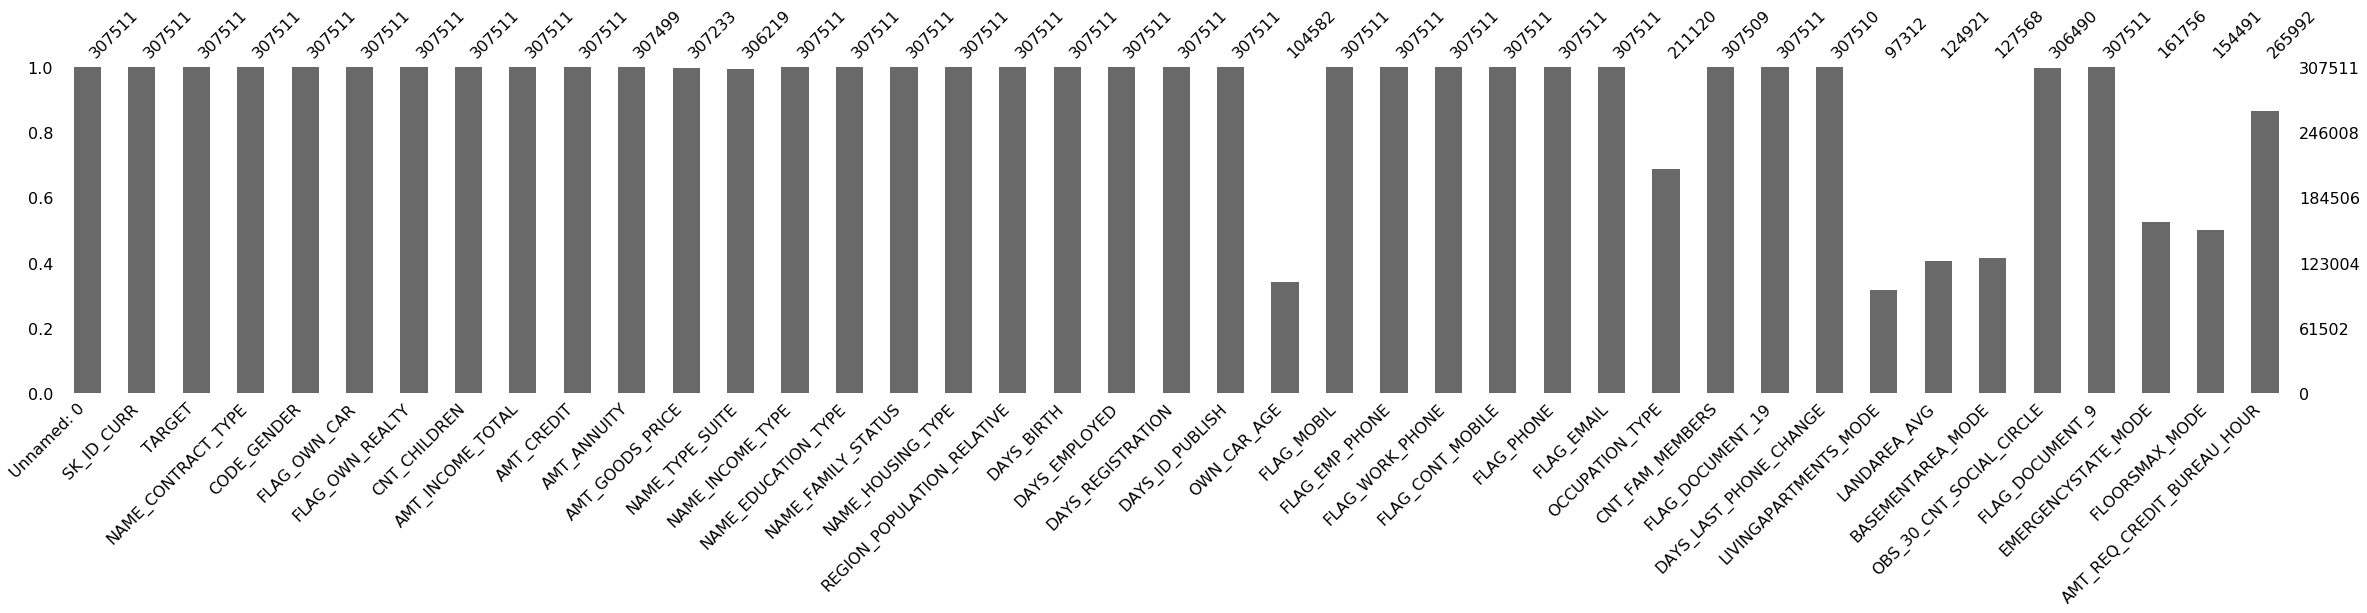

In [9]:
mn.bar(df40,figsize=(40,6))

##### Analisando as variáveis relativas a CARROS

In [10]:
df40.loc[:,['FLAG_OWN_CAR','OWN_CAR_AGE']].head(20)

,FLAG_OWN_CAR,OWN_CAR_AGE
0,N,NaN
1,N,NaN
2,Y,26.0
3,N,NaN
4,N,NaN
5,N,NaN
6,Y,17.0
7,Y,8.0
8,N,NaN
9,N,NaN


Foi observado que quando a pessoa não possuia carro ('FLAG_OWN_CAR'='N') o valor de 'OWN_CAR_AGE'=NaN, por isso substitui-se o NaN de OWN_CAR_AGE baseado na FLAG_OWN_CAR (N) por -1.

In [11]:
df40.OWN_CAR_AGE.fillna(-1, inplace = True)

In [12]:
df40.loc[:,['FLAG_OWN_CAR','OWN_CAR_AGE']].head(20)

,FLAG_OWN_CAR,OWN_CAR_AGE
0,N,-1.0
1,N,-1.0
2,Y,26.0
3,N,-1.0
4,N,-1.0
5,N,-1.0
6,Y,17.0
7,Y,8.0
8,N,-1.0
9,N,-1.0


In [13]:
df40.EMERGENCYSTATE_MODE.loc[df40.FLAG_OWN_CAR == 'Yes'] = 1

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
df40.EMERGENCYSTATE_MODE.loc[df40.FLAG_OWN_CAR == 'No'] = 0

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
df40.loc[:,['FLAG_OWN_CAR','OWN_CAR_AGE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 2 columns):
FLAG_OWN_CAR    307511 non-null object
OWN_CAR_AGE     307511 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.7+ MB


In [16]:
df40.to_csv('application_train_40c1.csv') # guardo as alteracoes feitas

##### Analisando as variáveis relativas as familias

In [17]:
df40 = pd.read_csv('application_train_40c1.csv',) #leio o arquivo com as alteracoes de carros

In [18]:
df40.loc[:,['CNT_CHILDREN','NAME_FAMILY_STATUS' == 'Unknown','CNT_FAM_MEMBERS']].head(10)

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,CNT_CHILDREN,False,CNT_FAM_MEMBERS
0,0,NaN,1.0
1,0,NaN,2.0
2,0,NaN,1.0
3,0,NaN,2.0
4,0,NaN,1.0
5,0,NaN,2.0
6,1,NaN,3.0
7,0,NaN,2.0
8,0,NaN,2.0
9,0,NaN,1.0


In [19]:
set(df40.NAME_FAMILY_STATUS) # descubro quais são os valores possíveis neste caso

{'Civil marriage',
 'Married',
 'Separated',
 'Single / not married',
 'Unknown',
 'Widow'}

Os diferentes valores que temos em Family status nos ajudam a definir um valor para este status:

{'Civil marriage' = 2,
 'Married' = 2,
 'Separated' = 1,
 'Single / not married' = 1,
 'Unknown' = CNT_FAM_MEMBERS - CNT_CHILDREN,
 'Widow' = 1}
 
Crio uma nova variavel para armazenar o numero de pessoas na casa

In [20]:
df40.NAME_FAMILY_STATUS.loc[df40.NAME_FAMILY_STATUS == 'Civil marriage'] = 2
df40.NAME_FAMILY_STATUS.loc[df40.NAME_FAMILY_STATUS == 'Married'] = 2
df40.NAME_FAMILY_STATUS.loc[df40.NAME_FAMILY_STATUS == 'Separated'] = 1
df40.NAME_FAMILY_STATUS.loc[df40.NAME_FAMILY_STATUS == 'Single / not married'] = 1
df40.NAME_FAMILY_STATUS.loc[df40.NAME_FAMILY_STATUS == 'Widow'] = 1

for i in df40.index:
    if df40.NAME_FAMILY_STATUS[i] == 'Unknown': 
        df40.NAME_FAMILY_STATUS[i] = (df40.CNT_FAM_MEMBERS[i] - df40.CNT_CHILDREN[i])

c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
c:\users\risquass\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
#df40.NAME_FAMILY_STATUS_NO

df40.loc[:,['CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']].head(10)

,CNT_CHILDREN,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
0,0,1,1.0
1,0,2,2.0
2,0,1,1.0
3,0,2,2.0
4,0,1,1.0
5,0,2,2.0
6,1,2,3.0
7,0,2,2.0
8,0,2,2.0
9,0,1,1.0


In [22]:
df40.loc[:,['CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 3 columns):
CNT_CHILDREN          307511 non-null int64
NAME_FAMILY_STATUS    307509 non-null object
CNT_FAM_MEMBERS       307509 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 19.4+ MB


Considerando que somente as duas linhas da familia estao com valores faltantes, podemos ignorar estes valores, apagando estas duas linhas do dataframe

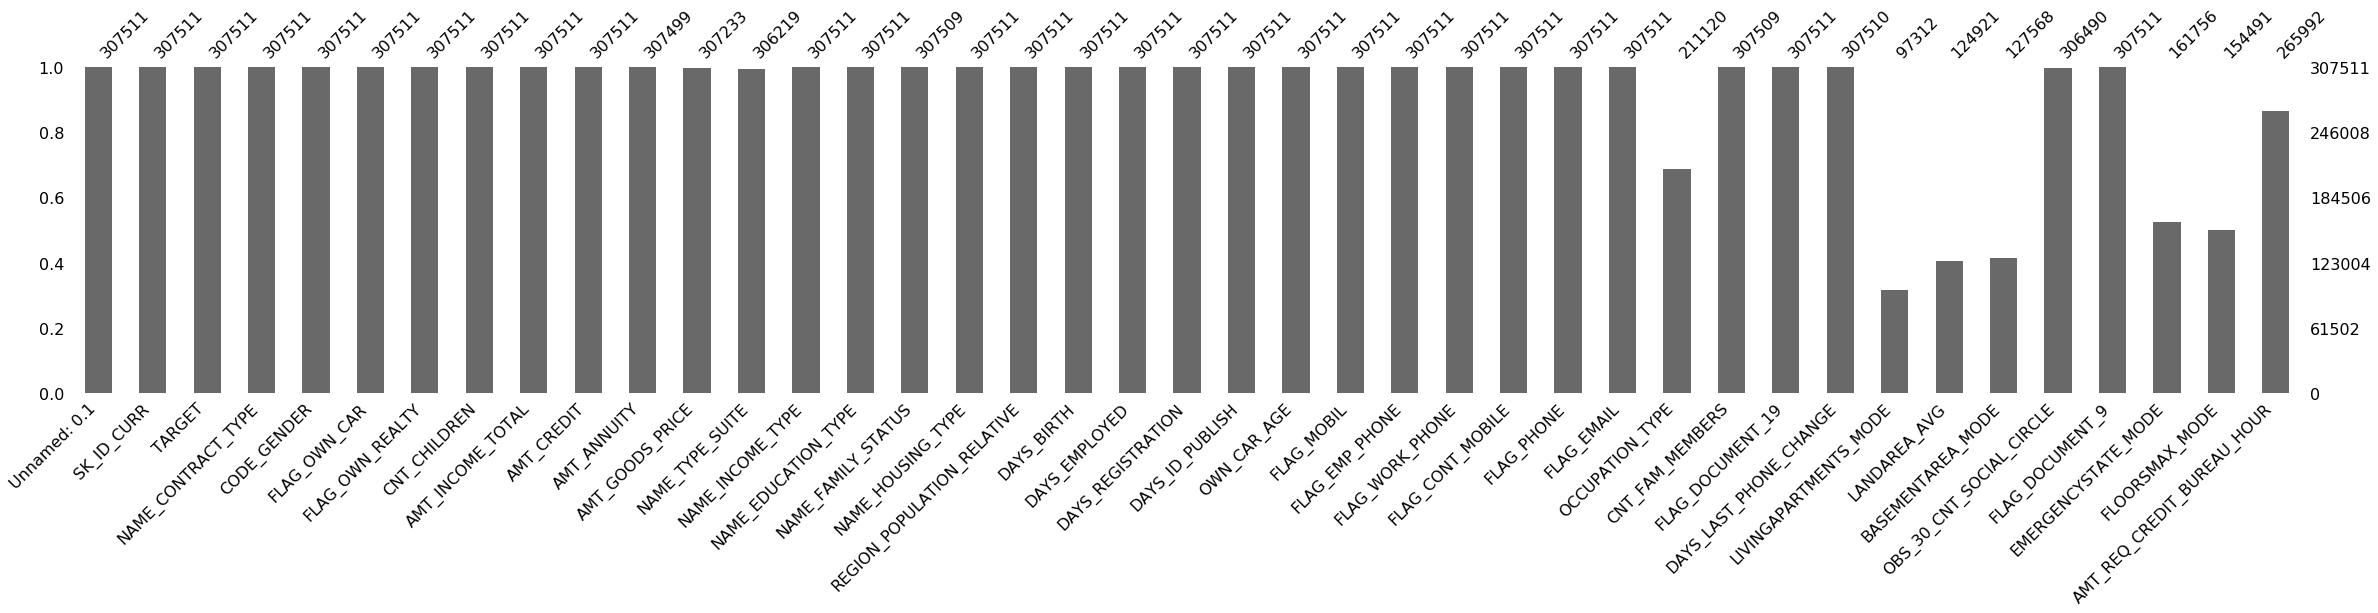

In [23]:
mn.bar(df40,figsize=(40,6))

In [24]:
df40.to_csv('application_train_40c2.csv')

##### Analisando a variável OCCUPATION_TYPE

In [25]:
df40 = pd.read_csv('application_train_40c2.csv',) #leio o arquivo com as alteracoes de carros e familias

In [26]:
df.loc[:,['DAYS_EMPLOYED','FLAG_WORK_PHONE','OCCUPATION_TYPE']].head(10)

,DAYS_EMPLOYED,FLAG_WORK_PHONE,OCCUPATION_TYPE
0,-637,0,Laborers
1,-1188,0,Core staff
2,-225,1,Laborers
3,-3039,0,Laborers
4,-3038,0,Core staff
5,-1588,1,Laborers
6,-3130,0,Accountants
7,-449,1,Managers
8,365243,0,NaN
9,-2019,0,Laborers


In [27]:
set(df40.OCCUPATION_TYPE) # descubro quais são os valores possíveis neste caso

{'Accountants',
 'Cleaning staff',
 'Cooking staff',
 'Core staff',
 'Drivers',
 'HR staff',
 'High skill tech staff',
 'IT staff',
 'Laborers',
 'Low-skill Laborers',
 'Managers',
 'Medicine staff',
 'Private service staff',
 'Realty agents',
 'Sales staff',
 'Secretaries',
 'Security staff',
 'Waiters/barmen staff',
 nan}

In [28]:
df40.OCCUPATION_TYPE.fillna('Unknown', inplace = True)

In [29]:
set(df40.OCCUPATION_TYPE) # confirmo que NaN foi trocado por Unknown

{'Accountants',
 'Cleaning staff',
 'Cooking staff',
 'Core staff',
 'Drivers',
 'HR staff',
 'High skill tech staff',
 'IT staff',
 'Laborers',
 'Low-skill Laborers',
 'Managers',
 'Medicine staff',
 'Private service staff',
 'Realty agents',
 'Sales staff',
 'Secretaries',
 'Security staff',
 'Unknown',
 'Waiters/barmen staff'}

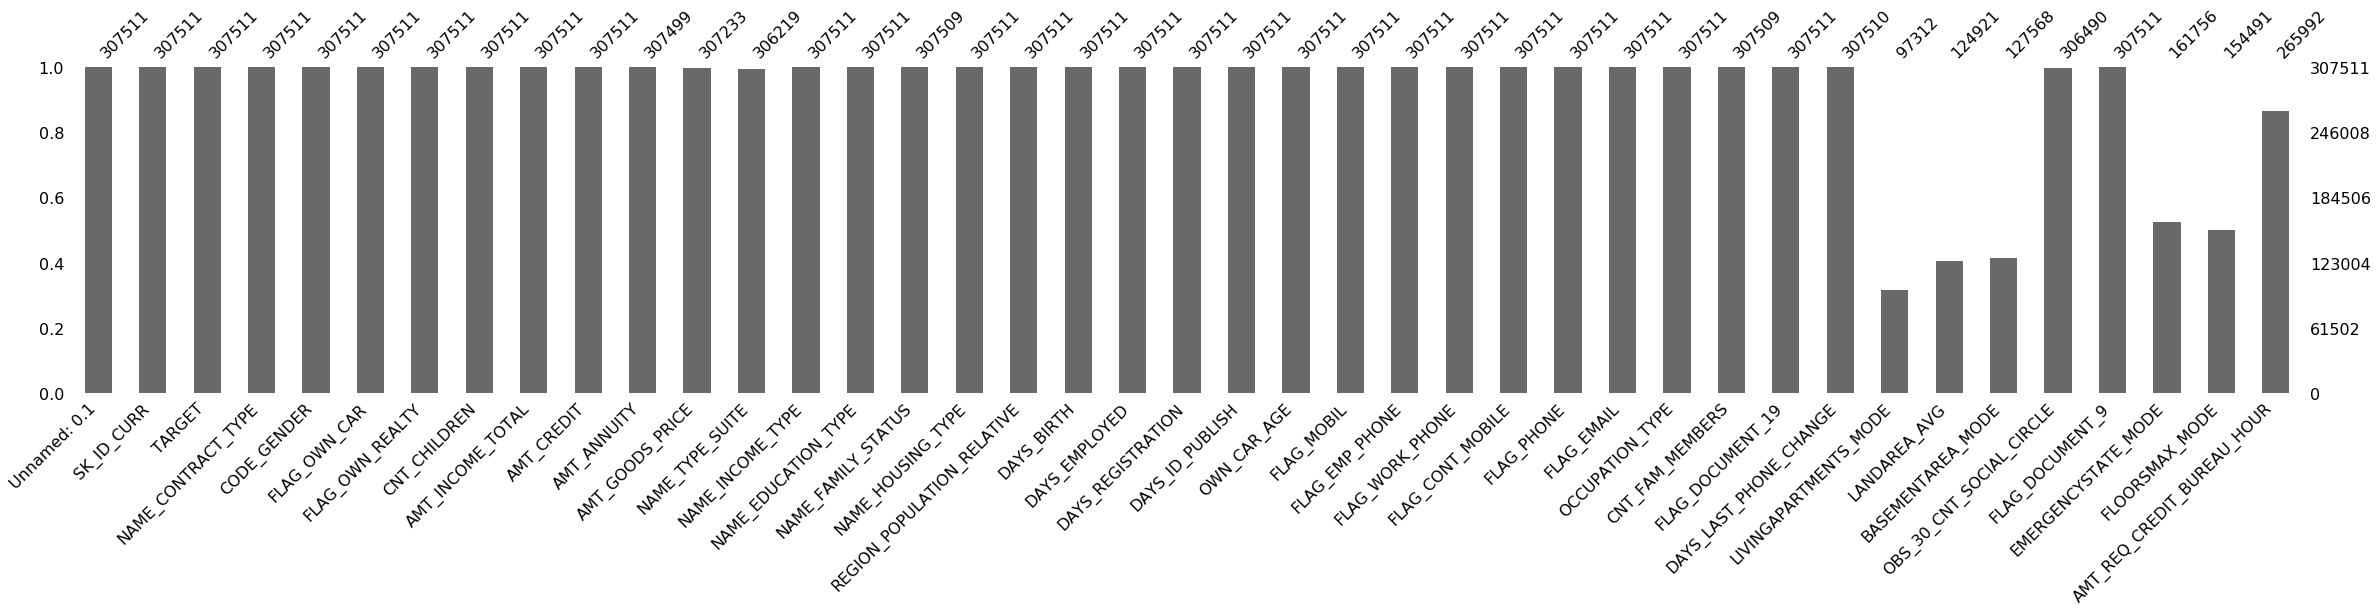

In [30]:
mn.bar(df40,figsize=(40,6))

In [31]:
df40.to_csv('application_train_40c3.csv') # guardo as alteracoes feitas

#### Analisando variáveis do imóvel

In [3]:
df40 = pd.read_csv('application_train_40c3.csv',) #leio o arquivo com as alteracoes de carros e familias

In [6]:
df40.LANDAREA_AVG.head()

0    0.0369
1    0.0130
2       NaN
3       NaN
4       NaN
Name: LANDAREA_AVG, dtype: float64

In [7]:
df40.ELEVATORS_AVG.head()

AttributeError: 'DataFrame' object has no attribute 'ELEVATORS_AVG'

In [ ]:
df40.APARTMENTS_MEDI.head()

In [ ]:
df40.LANDAREA_MODE.head()

In [ ]:
df40.COMMONAREA_MODE.head()

In [ ]:
df40.YEARS_BEGINEXPLUATATION_MEDI.head()

Nestas 6 variaveis, optei por substituir o NaN pela media dos valores

In [ ]:
df40.ENTRANCES_MODE.fillna(df40.LANDAREA_AVG.mean(), inplace = True)

In [ ]:
df40.ELEVATORS_AVG.fillna(df40.ELEVATORS_AVG.mean(), inplace = True)

In [ ]:
df40.APARTMENTS_MEDI.fillna(df40.APARTMENTS_MEDI.mean(), inplace = True)

In [ ]:
df40.LANDAREA_MODE.fillna(df40.LANDAREA_MODE.mean(), inplace = True)

In [ ]:
df40.COMMONAREA_MODE.fillna(df40.COMMONAREA_MODE.mean(), inplace = True)

In [ ]:
df40.YEARS_BEGINEXPLUATATION_MEDI.fillna(df40.YEARS_BEGINEXPLUATATION_MEDI.mean(), inplace = True)

In [ ]:
mn.bar(df40,figsize=(40,6))

In [ ]:
df40.to_csv('application_train_40c4.csv') # guardo as alteracoes feitas

#### Verificando EMERGENCYSTATE_MODE

In [ ]:
df40 = pd.read_csv('application_train_40c4.csv',) #leio o arquivo com as alteracoes de carros, familias e dados do apartamento

In [ ]:
df40.loc[:,['TARGET','EMERGENCYSTATE_MODE']].head(20)

In [ ]:
set(df40.EMERGENCYSTATE_MODE)

In [ ]:
df40.EMERGENCYSTATE_MODE.loc[df40.EMERGENCYSTATE_MODE == 'No'] = 0

In [ ]:
df40.EMERGENCYSTATE_MODE.loc[df40.EMERGENCYSTATE_MODE == 'Yes'] = 1

In [ ]:
df40.EMERGENCYSTATE_MODE.fillna(-1, inplace = True)

In [ ]:
df40.loc[:,['TARGET','EMERGENCYSTATE_MODE']].head()

In [ ]:
df40[['TARGET','EMERGENCYSTATE_MODE']].corr()

In [ ]:
mn.bar(df40,figsize=(40,6))

In [ ]:
df40.to_csv('application_train_40c5.csv') # guardo as alteracoes feitas

#### Conhecendo as variaveis que ainda precisam de tratamento

In [ ]:
df40 = pd.read_csv('application_train_40c5.csv',) #leio o arquivo com as alteracoes de carros, familias e dados do apartamento

In [ ]:
df40[['TARGET','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT']].head(30)

In [ ]:
df40[['TARGET','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT']].corr()

In [ ]:
df40.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df40.AMT_REQ_CREDIT_BUREAU_DAY.mean(), inplace = True)

In [ ]:
df40.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df40.AMT_REQ_CREDIT_BUREAU_QRT.mean(), inplace = True)

In [ ]:
df40[['TARGET','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT']].corr()

In [ ]:
df40[['TARGET','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT']].head(30)

In [ ]:
mn.bar(df40,figsize=(40,6))

Limpando eventuais NaNs que tenham sobrado

In [ ]:
df40.dropna(inplace=True) 

In [ ]:
df40.to_csv('application_train_40c6.csv') # guardo as alteracoes feitas

Verificando as variavies Object para transformar em discreta

In [ ]:
df40 = pd.read_csv('application_train_40c6.csv',)

In [ ]:
df40.info()

In [ ]:
set(df40.NAME_CONTRACT_TYPE)

In [ ]:
df40.NAME_CONTRACT_TYPE.loc[df40.NAME_CONTRACT_TYPE == 'Cash loans'] = 1

In [ ]:
df40.NAME_CONTRACT_TYPE.loc[df40.NAME_CONTRACT_TYPE == 'Revolving loans'] = 0

In [ ]:
df40[['TARGET','NAME_CONTRACT_TYPE']].corr()

In [ ]:
set(df40.CODE_GENDER)

In [ ]:
df40.CODE_GENDER.loc[df40.CODE_GENDER == 'XNA']

In [ ]:
df40.CODE_GENDER.loc[df40.CODE_GENDER == 'XNA'] = np.nan

In [ ]:
df40.CODE_GENDER.loc[df40.CODE_GENDER == 'F'] = 1

In [ ]:
df40.CODE_GENDER.loc[df40.CODE_GENDER == 'M'] = 0

In [ ]:
df40[['TARGET','CODE_GENDER']].corr()

In [ ]:
set(df40.FLAG_OWN_REALTY)

In [ ]:
df40.FLAG_OWN_REALTY.loc[df40.FLAG_OWN_REALTY == 'Y'] = 1

In [ ]:
df40.FLAG_OWN_REALTY.loc[df40.FLAG_OWN_REALTY == 'N'] = 0

In [ ]:
pd.crosstab(df40.TARGET,df40.FLAG_OWN_REALTY)

In [ ]:
df40[['TARGET','FLAG_OWN_REALTY']].corr()

In [ ]:
set(df40.NAME_TYPE_SUITE)

In [ ]:
pd.crosstab(df40.TARGET,df40.NAME_TYPE_SUITE)

In [ ]:
set(df40.NAME_INCOME_TYPE)

In [ ]:
pd.crosstab(df40.TARGET,df40.NAME_INCOME_TYPE)

In [ ]:
set(df40.NAME_EDUCATION_TYPE)

In [ ]:
pd.crosstab(df40.TARGET,df40.NAME_EDUCATION_TYPE)

In [ ]:
set(df40.OCCUPATION_TYPE)

In [ ]:
pd.crosstab(df40.TARGET,df40.OCCUPATION_TYPE)

In [ ]:
df40.to_csv('application_train_40c7.csv') # guardo as alteracoes feitas

#### Verificando as correlacoes

In [ ]:
df40 = pd.read_csv('application_train_40c.csv',) #leio o arquivo com as alteracoes de carros, familias e dados do apartamento

In [ ]:
df40.corr()

In [ ]:
plt.matshow(df40.corr())

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df40.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df40.corr().round(2), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df40.TARGET.plot(kind='box', subplots=True, )